# 1. Project Overview
This project explores the **ESG (Environmental, Social, Governance) and Financial Performance dataset** containing information about 1,000 global companies from 2015–2025.  
The aim is to analyze how ESG factors correlate with financial performance, build predictive models, and provide insights for sustainable investing strategies.


# 2. Load & Inspect Data
We first load the dataset and perform initial inspections to understand:
- Dimensions of the dataset (rows X columns)  
- Column names, data types  
- A few sample rows  
- Missing values and basic descriptive statistics  


In [25]:
#importing the useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#loading the data set
path = r"E:\Project Dataset\company_esg_financial_dataset.csv"
import pandas as pd
df = pd.read_csv(path)
df.head()


,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8


In [9]:
type (df)  #Shows the type of the dataset

pandas.core.frame.DataFrame

In [10]:
df.columns  #Shows the name of the columns

Index(['CompanyID', 'CompanyName', 'Industry', 'Region', 'Year', 'Revenue',
       'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall',
       'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions',
       'WaterUsage', 'EnergyConsumption'],
      dtype='object')

In [11]:
df.head() #shows the first five rows of the dataset

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8


In [12]:
df.tail() # gives the last five rows

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
10995,1000,Company_1000,Consumer Goods,Latin America,2021,3419.2,21.7,14416.7,0.4,52.2,67.2,46.3,43.1,498875.8,623594.7,2494378.8
10996,1000,Company_1000,Consumer Goods,Latin America,2022,3518.8,21.4,8078.9,2.9,51.9,68.7,44.7,42.3,506013.7,632517.1,2530068.4
10997,1000,Company_1000,Consumer Goods,Latin America,2023,3417.1,17.1,13263.4,-2.9,52.9,72.4,43.1,43.2,473561.5,591951.9,2367807.7
10998,1000,Company_1000,Consumer Goods,Latin America,2024,3183.2,15.7,6960.1,-6.8,52.0,72.4,40.5,42.9,441310.9,551638.6,2206554.3
10999,1000,Company_1000,Consumer Goods,Latin America,2025,3173.5,17.5,5666.1,-0.3,51.8,74.5,39.7,41.4,430741.6,538427.0,2153707.9


In [13]:
df.shape  #gives the shape of the data set

(11000, 16)

In [14]:
df.info() #gives column name and its data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

In [15]:
print(df.describe())  # Summary statistics

          CompanyID          Year        Revenue  ProfitMargin      MarketCap  \
count  11000.000000  11000.000000   11000.000000  11000.000000   11000.000000   
mean     500.500000   2020.000000    4670.850591     10.900455   13380.622236   
std      288.688113      3.162421    9969.954369      8.758711   39922.870373   
min        1.000000   2015.000000      35.900000    -20.000000       1.800000   
25%      250.750000   2017.000000     938.775000      5.300000    1098.525000   
50%      500.500000   2020.000000    1902.300000     10.500000    3096.450000   
75%      750.250000   2023.000000    4342.625000     16.300000    9995.500000   
max     1000.000000   2025.000000  180810.400000     50.000000  865271.700000   

         GrowthRate   ESG_Overall  ESG_Environmental    ESG_Social  \
count  10000.000000  11000.000000       11000.000000  11000.000000   
mean       4.830370     54.615273          56.416991     55.660582   
std        9.424787     15.893937          26.767233     23.

In [16]:
print(df.dtypes) #Data Type Validation

CompanyID              int64
CompanyName           object
Industry              object
Region                object
Year                   int64
Revenue              float64
ProfitMargin         float64
MarketCap            float64
GrowthRate           float64
ESG_Overall          float64
ESG_Environmental    float64
ESG_Social           float64
ESG_Governance       float64
CarbonEmissions      float64
WaterUsage           float64
EnergyConsumption    float64
dtype: object


# 3. Data Cleaning
Data often contains issues like duplicates, missing values, and inconsistent data types.  
Here we:
1. Remove duplicates  
2. Fix data types (categorical vs numeric)  
3. Handle missing values (impute or drop)  
4. Detect and treat outliers  


In [17]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 CompanyID               0
CompanyName             0
Industry                0
Region                  0
Year                    0
Revenue                 0
ProfitMargin            0
MarketCap               0
GrowthRate           1000
ESG_Overall             0
ESG_Environmental       0
ESG_Social              0
ESG_Governance          0
CarbonEmissions         0
WaterUsage              0
EnergyConsumption       0
dtype: int64


In [23]:
# Fill missing values in 'GrowthRate' with the median
df['GrowthRate'] = df['GrowthRate'].fillna(df['GrowthRate'].median())
#We use the median to fill missing GrowthRate values to avoid distortion from potential outliers.

# Verify missing values are handled
print("\nMissing Values after handling:\n", df.isnull().sum())


Missing Values after handling:
 CompanyID            0
CompanyName          0
Industry             0
Region               0
Year                 0
Revenue              0
ProfitMargin         0
MarketCap            0
GrowthRate           0
ESG_Overall          0
ESG_Environmental    0
ESG_Social           0
ESG_Governance       0
CarbonEmissions      0
WaterUsage           0
EnergyConsumption    0
dtype: int64


In [24]:
#Check for duplicates
print("\nNumber of duplicates:", df.duplicated().sum())


Number of duplicates: 0


In [28]:
# Identify outliers using IQR for key numerical columns
key_numerical = ['Revenue', 'ESG_Overall', 'CarbonEmissions', 'GrowthRate']

for col in key_numerical:
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"\nOutliers in {col}: {len(outliers)} rows")


Outliers in Revenue: 1202 rows

Outliers in ESG_Overall: 13 rows

Outliers in CarbonEmissions: 1289 rows

Outliers in GrowthRate: 216 rows


In [32]:
import matplotlib.pyplot as plt

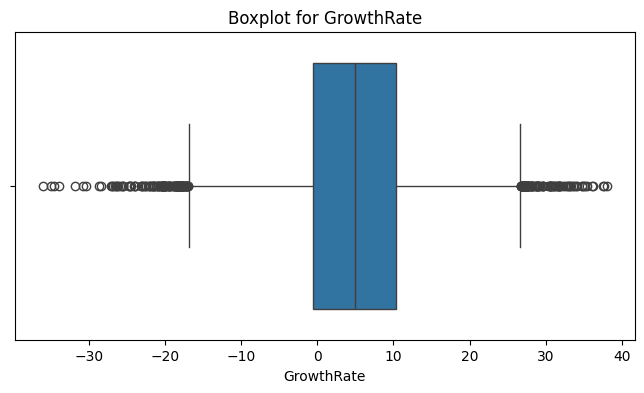

In [35]:
# Visualize outliers with a boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df[col])
plt.title(f'Boxplot for {col}')
plt.show()

Given the significant number of outliers in Revenue and CarbonEmissions, we need to decide whether to remove them or keep them, as they could represent valid data (e.g., large companies for Revenue or high-pollution industries for CarbonEmissions). The low number of outliers in ESG_Overall suggests it might be cleaner, but we can investigate further. For GrowthRate, 216 outliers is moderate, and since we imputed missing values with the median, we should check if these outliers are reasonable.
For now, I recommend keeping the outliers unless they appear erroneous (e.g., negative CarbonEmissions or unrealistic Revenue). Instead, we can proceed to the EDA phase to explore patterns and relationships, which will help us understand if these outliers are meaningful.

# Start Exploratory Data Analysis (EDA) - Question 1
#### What is the distribution of ESG_Overall scores?
This helps understand the spread and central tendency of ESG scores across companies.

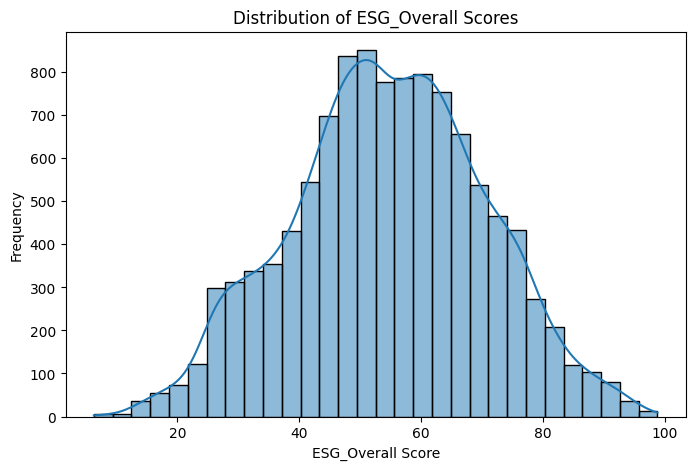


Summary statistics for ESG_Overall:
 count    11000.000000
mean        54.615273
std         15.893937
min          6.300000
25%         44.100000
50%         54.600000
75%         65.600000
max         98.800000
Name: ESG_Overall, dtype: float64


In [36]:
# Question 1: What is the distribution of ESG_Overall scores?
plt.figure(figsize=(8, 5))
sns.histplot(df['ESG_Overall'], kde=True, bins=30)
plt.title('Distribution of ESG_Overall Scores')
plt.xlabel('ESG_Overall Score')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for ESG_Overall
print("\nSummary statistics for ESG_Overall:\n", df['ESG_Overall'].describe())

The plot shows a roughly bell-shaped distribution with a peak around 50-60, indicating that most companies have ESG scores in this range, which aligns with the mean (54.62) and median (54.60) from the summary statistics. The distribution appears slightly skewed with longer tails on both ends, suggesting some companies have exceptionally low (near 6.3) or high (near 98.8) scores, consistent with the 13 outliers you identified earlier. The KDE (Kernel Density Estimate) curve smooths this out, reinforcing the near-normal distribution.

Count: 11,000 rows, indicating a large dataset.

Mean: 54.62, close to the median (54.60), suggesting a fairly symmetric distribution.

Std: 15.89, indicating moderate variability in ESG scores.

Min/Max: Scores range from 6.3 to 98.8, showing a wide spread.

Quartiles: 25% of companies have scores below 44.1, and 75% below 65.6, with the interquartile range (44.1–65.6) capturing the middle 50%.

Outliers: You previously noted 13 outliers, likely at the extreme ends (near 6.3 or 98.8), but these seem plausible for ESG scores (e.g., exceptionally sustainable or unsustainable companies).

# EDA - Question 2: How do ESG_Overall scores vary by industry?
This is a bivariate analysis to explore how ESG_Overall scores differ across industries, which can reveal sector-specific sustainability trends (e.g., tech vs. energy). We’ll use a boxplot to visualize the distribution of ESG scores by industry.

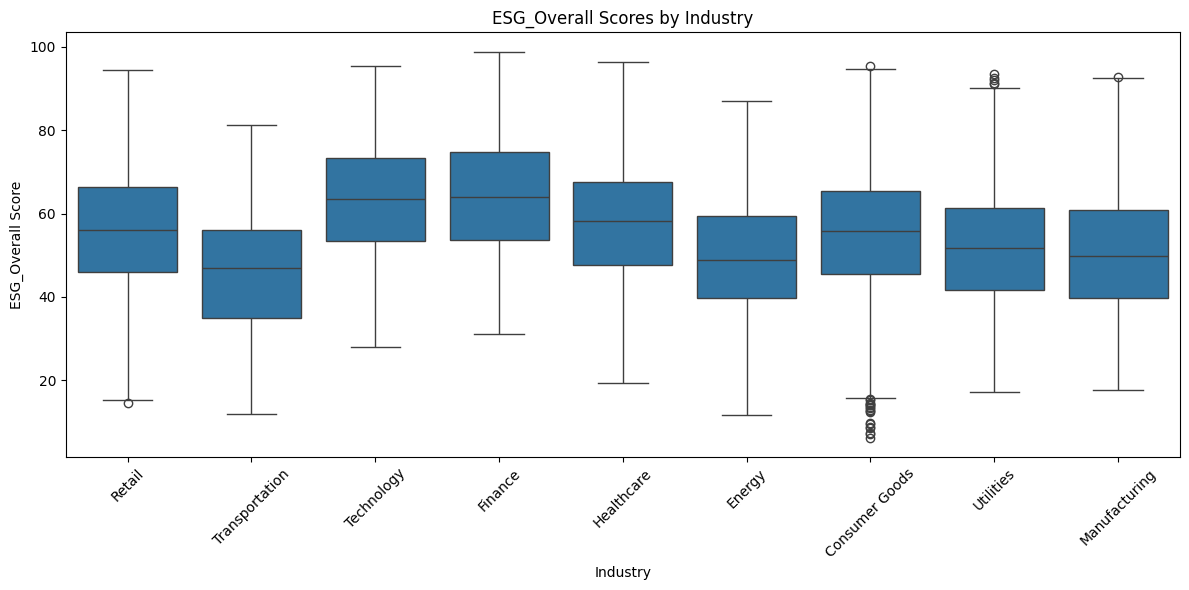


ESG_Overall statistics by Industry:
                  count       mean        std   min    25%    50%     75%   max
Industry                                                                      
Consumer Goods  1276.0  54.829467  15.155645   6.3  45.50  55.85  65.325  95.4
Energy          1188.0  49.014815  14.912623  11.6  39.70  48.85  59.325  86.9
Finance         1243.0  64.620434  13.690115  31.1  53.65  64.00  74.700  98.8
Healthcare      1331.0  57.254395  15.225486  19.3  47.70  58.20  67.500  96.3
Manufacturing   1287.0  50.462626  14.859230  17.8  39.70  49.70  60.850  92.8
Retail          1166.0  55.681818  15.170061  14.6  45.90  56.10  66.375  94.5
Technology      1045.0  63.345167  14.389427  28.1  53.50  63.50  73.400  95.3
Transportation  1287.0  46.034499  14.877605  12.0  34.90  47.00  55.950  81.2
Utilities       1177.0  51.601274  14.525451  17.1  41.70  51.80  61.400  93.4


In [38]:
# Question 2: How do ESG_Overall scores vary by industry?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='ESG_Overall', data=df)
plt.xticks(rotation=45)
plt.title('ESG_Overall Scores by Industry')
plt.xlabel('Industry')
plt.ylabel('ESG_Overall Score')
plt.tight_layout()
plt.show()

# Summary statistics by industry
industry_esg_stats = df.groupby('Industry')['ESG_Overall'].describe()
print("\nESG_Overall statistics by Industry:\n", industry_esg_stats)

### Boxplot Observations:

The median ESG scores (middle line of each box) vary across industries, with Finance and Technology appearing to have higher medians (around 60-70), while Transportation and Energy have lower medians (around 40-50).
The interquartile range (box height) is relatively consistent across industries, suggesting similar variability in scores within each sector.
Outliers are present (e.g., in Consumer Goods, Energy, and Manufacturing), with some companies scoring near 100 or below 20, which aligns with the 13 outliers noted earlier for ESG_Overall.
The spread is widest in Finance and Technology (whiskers extend further), indicating greater diversity in ESG performance.


### Statistical Summary:

Finance: Highest mean (64.62) and max (98.8), suggesting strong sustainability leadership.

Technology: Mean of 63.35, with a high max (95.3), indicating another high-performing sector.

Transportation: Lowest mean (46.03) and max (81.2), reflecting challenges in sustainability.

Energy: Mean of 49.01, with a low max (86.9), likely due to high carbon emissions.

Healthcare: Mean of 57.25, with a balanced distribution.

Consumer Goods, Retail, Utilities, Manufacturing: Means range from 50.46 to 55.68, with moderate performance.

Sample Size: Counts range from 1045 (Technology) to 1331 (Healthcare), ensuring robust averages.



This suggests that finance and tech sectors may lead in ESG adoption, while transportation and energy lag, possibly due to resource-intensive operations.

# EDA - Question 3: Is there a correlation between Revenue and ESG_Overall?
This is a bivariate analysis to explore the relationship between financial performance (Revenue) and sustainability (ESG_Overall), which is key for your role as a data advisor to a sustainable investment firm. We’ll use a scatter plot and calculate the correlation coefficient.

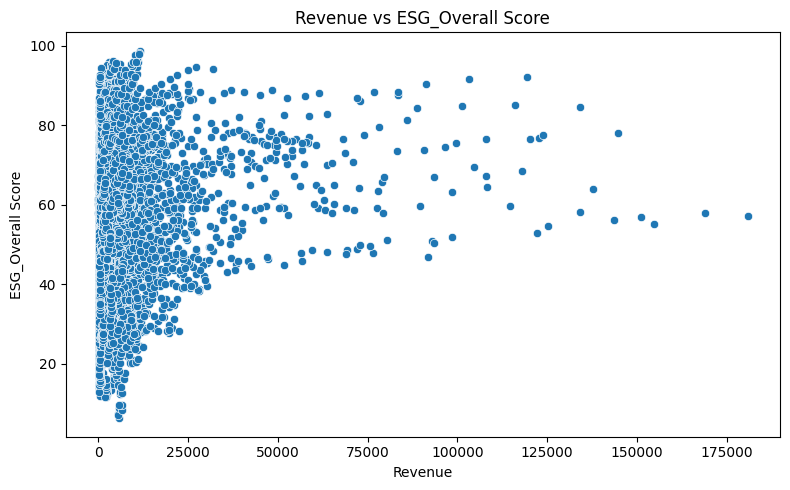


Correlation between Revenue and ESG_Overall: 0.149


In [39]:
# Question 3: Is there a correlation between Revenue and ESG_Overall?
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Revenue', y='ESG_Overall', data=df)
plt.title('Revenue vs ESG_Overall Score')
plt.xlabel('Revenue')
plt.ylabel('ESG_Overall Score')
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['Revenue'].corr(df['ESG_Overall'])
print(f"\nCorrelation between Revenue and ESG_Overall: {correlation:.3f}")

### Scatter Plot Observations:

The plot shows a dense cluster of points at lower Revenue values (0–25,000), with ESG_Overall scores spread across 20–100. This suggests many smaller companies with varied ESG performance.
As Revenue increases, the number of data points decreases, with a more scattered distribution. This reflects the 1202 outliers in Revenue, where some companies have extremely high revenues (up to 175,000, likely in thousands or millions depending on units).
There’s no clear linear trend, but there’s a slight upward tendency at higher revenues, where some companies achieve higher ESG scores (e.g., above 80), though the relationship is weak.
The dense cluster at low revenue with a wide ESG range indicates that ESG performance is not strongly tied to company size for smaller firms.


### Correlation Coefficient:

The correlation of 0.149 indicates a weak positive relationship between Revenue and ESG_Overall. This means that, on average, higher revenue companies tend to have slightly higher ESG scores, but the association is not strong (typically, correlations below 0.3 are considered weak).
The presence of many outliers in Revenue (1202) likely dilutes the correlation, as extreme values can skew the linear relationship.



This suggests that while larger companies might invest more in sustainability (possibly due to resources or investor pressure), other factors (e.g., industry, governance practices) play a larger role in determining ESG scores.

# EDA - Question 4: How have ESG_Overall scores changed over the years?
This is a bivariate analysis to explore trends in ESG_Overall scores over time using the Year column, which is critical for assessing sustainability progress. We’ll use a line plot to visualize the trend.

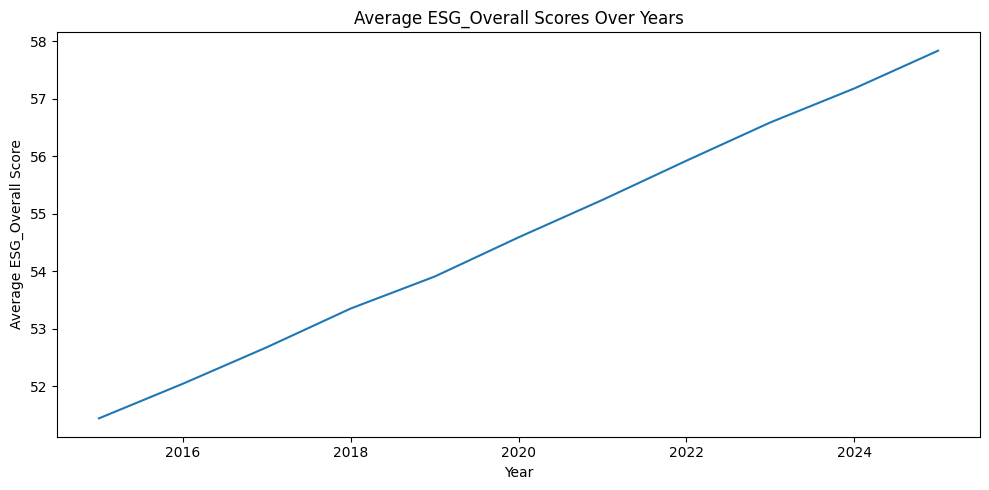


ESG_Overall statistics by Year:
        count     mean        std   min     25%    50%     75%   max
Year                                                               
2015  1000.0  51.4419  15.788400   7.4  41.000  51.50  62.400  92.9
2016  1000.0  52.0439  15.824794   6.3  41.500  52.25  63.200  94.8
2017  1000.0  52.6777  15.799715   7.2  42.200  52.65  63.400  96.0
2018  1000.0  53.3514  15.783524   8.9  42.900  53.10  64.225  96.7
2019  1000.0  53.9070  15.794085   8.5  43.400  53.70  64.725  96.9
2020  1000.0  54.5884  15.798570   9.7  44.475  54.45  65.100  98.2
2021  1000.0  55.2397  15.752222   9.6  45.100  55.10  65.925  97.7
2022  1000.0  55.9208  15.749906  12.5  45.700  56.00  66.725  97.8
2023  1000.0  56.5865  15.763364  12.9  46.375  56.85  67.225  98.8
2024  1000.0  57.1767  15.721227  12.7  47.100  57.50  68.100  98.3
2025  1000.0  57.8340  15.700532  14.3  47.250  58.05  68.500  98.0


In [40]:
# Import necessary libraries (if not already imported)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Question 4: How have ESG_Overall scores changed over the years?
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='ESG_Overall', data=df.groupby('Year')['ESG_Overall'].mean().reset_index())
plt.title('Average ESG_Overall Scores Over Years')
plt.xlabel('Year')
plt.ylabel('Average ESG_Overall Score')
plt.tight_layout()
plt.show()

# Summary statistics by year
year_esg_stats = df.groupby('Year')['ESG_Overall'].describe()
print("\nESG_Overall statistics by Year:\n", year_esg_stats)

### Line Plot Observations:

The plot shows a clear upward trend in average ESG_Overall scores from 2016 (around 52) to 2025 (around 58). This indicates a gradual improvement in sustainability performance over the decade.
The trend is fairly linear with a steady increase, suggesting consistent efforts by companies to enhance ESG practices, possibly driven by regulatory changes, investor pressure, or market demand (e.g., post-2015 Paris Agreement).
No significant dips or spikes are visible, indicating stable progress without major disruptions.


### Statistical Summary by Year:

Count: 1000 companies per year, ensuring consistent sample size and reliable averages.

Mean Trend: Increases from 51.44 (2015) to 57.83 (2025), a rise of about 6.4 points over 10 years, or roughly 0.64 points annually.

Std: Remains stable around 15.7–15.8, indicating consistent variability in scores across years.

Min/Max: The minimum score rises slightly (e.g., 6.3 in 2016 to 14.3 in 2025), and the maximum peaks at 98.8 (2023), reflecting a tightening range at the top end.

Quartiles: All quartiles (25%, 50%, 75%) shift upward, confirming broad-based improvement across the distribution.




This suggests a positive trend in ESG adoption, likely reflecting growing awareness and investment in sustainability, which aligns with your role in advising sustainable businesses.

# EDA - Question 5: Which regions have the highest average ESG_Overall scores?
This is a bivariate analysis to explore regional differences in ESG_Overall scores, which can help identify geographic leaders in sustainability. We’ll use a bar plot to visualize the average scores by region.

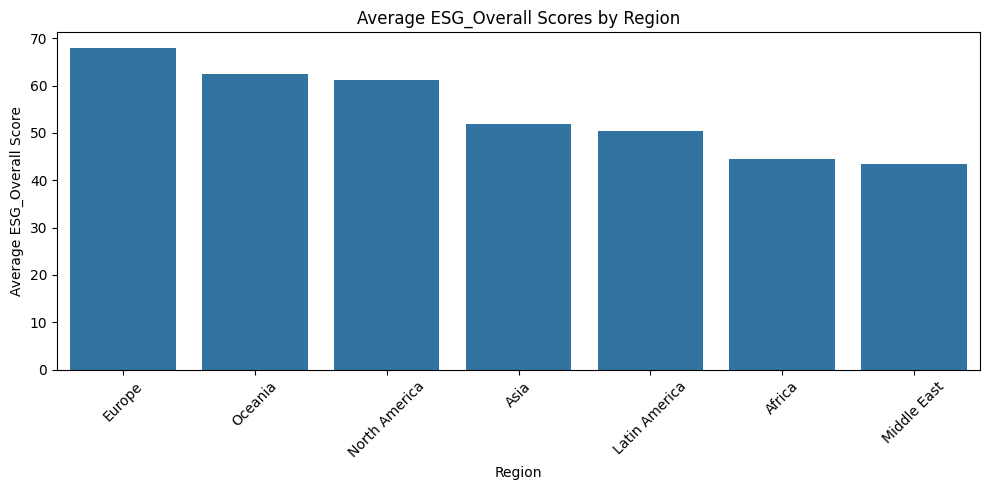


ESG_Overall statistics by Region:
                 count       mean        std   min   25%    50%    75%   max
Region                                                                     
Africa         1463.0  44.508612  12.452777  13.5  35.4  45.00  53.40  82.8
Asia           1672.0  51.902333  13.520992  20.1  42.3  51.95  61.90  89.8
Europe         1540.0  67.865455  13.187066  29.3  59.1  68.00  76.60  98.8
Latin America  1507.0  50.519841  14.100845  11.6  42.9  51.30  59.25  96.0
Middle East    1617.0  43.444032  14.260001   6.3  33.1  43.50  52.40  80.8
North America  1540.0  61.215065  12.271066  24.9  52.7  62.00  70.40  93.4
Oceania        1661.0  62.435160  13.241752  25.0  53.6  61.90  72.20  95.3


In [41]:
# Import necessary libraries (if not already imported)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Question 5: Which regions have the highest average ESG_Overall scores?
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='ESG_Overall', data=df.groupby('Region')['ESG_Overall'].mean().reset_index().sort_values('ESG_Overall', ascending=False))
plt.xticks(rotation=45)
plt.title('Average ESG_Overall Scores by Region')
plt.xlabel('Region')
plt.ylabel('Average ESG_Overall Score')
plt.tight_layout()
plt.show()

# Summary statistics by region
region_esg_stats = df.groupby('Region')['ESG_Overall'].describe()
print("\nESG_Overall statistics by Region:\n", region_esg_stats)

### Bar Plot Observations:

Europe leads with the highest average ESG_Overall score (around 67–70), followed closely by Oceania (around 62–65) and North America (around 61–64).
Asia and Latin America have moderate scores (around 51–52), while Africa and Middle East lag with the lowest averages (around 43–44).
The bars are of similar height within each region, suggesting consistent performance within regions, though the exact variability isn’t visible (addressed by statistics below).


### Statistical Summary by Region:

Europe: Mean of 67.87, max of 98.8, and a tight interquartile range (59.1–76.6), indicating strong and consistent sustainability leadership.

Oceania: Mean of 62.44, max of 95.3, with a similar spread (53.6–72.2), showing robust performance.

North America: Mean of 61.22, max of 93.4, with a range of 52.7–70.4, reflecting solid ESG adoption.

Asia: Mean of 51.90, max of 89.8, with a broader spread (42.3–61.9), indicating more variability.

Latin America: Mean of 50.52, max of 96.0, with a range of 42.9–59.25, showing moderate performance.

Africa: Mean of 44.51, max of 82.8, with a lower range (35.4–53.4), suggesting challenges in sustainability.

Middle East: Mean of 43.44, max of 80.8, with the lowest range (33.1–52.4), indicating the weakest ESG performance.


Sample Size: Counts range from 1463 (Africa) to 1672 (Asia), ensuring reliable averages.



This highlights Europe as a sustainability leader, possibly due to stringent regulations (e.g., EU Green Deal), while Africa and the Middle East lag, potentially due to economic or infrastructural constraints.

# EDA - Question 6: Is there a relationship between CarbonEmissions and ESG_Environmental?
This is a bivariate analysis to explore the relationship between environmental impact (CarbonEmissions) and the environmental component of ESG (ESG_Environmental), which is critical for identifying how emission reductions can boost sustainability scores. We’ll use a scatter plot and calculate the correlation coefficient.

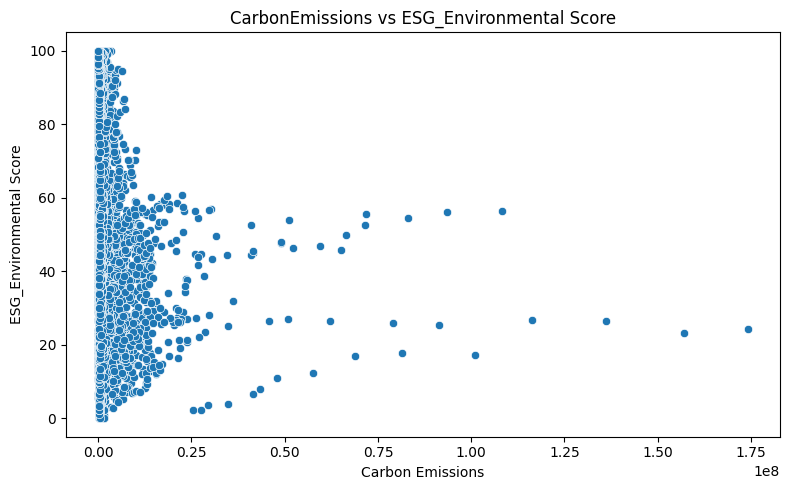


Correlation between CarbonEmissions and ESG_Environmental: -0.152


In [42]:
# Import necessary libraries (if not already imported)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Question 6: Is there a relationship between CarbonEmissions and ESG_Environmental?
plt.figure(figsize=(8, 5))
sns.scatterplot(x='CarbonEmissions', y='ESG_Environmental', data=df)
plt.title('CarbonEmissions vs ESG_Environmental Score')
plt.xlabel('Carbon Emissions')
plt.ylabel('ESG_Environmental Score')
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['CarbonEmissions'].corr(df['ESG_Environmental'])
print(f"\nCorrelation between CarbonEmissions and ESG_Environmental: {correlation:.3f}")

### Scatter Plot Observations:

The plot shows a dense cluster of points at lower CarbonEmissions values (0–0.25), with ESG_Environmental scores ranging widely from 0 to 100. This suggests that companies with low emissions have varied environmental performance.
As CarbonEmissions increases (up to 1.75), the number of data points decreases, reflecting the 1289 outliers in CarbonEmissions. Higher emission levels are associated with lower ESG_Environmental scores, though the trend is not strongly linear.
There’s a general downward tendency: companies with higher emissions (e.g., 1.0–1.75) tend to have lower environmental scores (below 60), while those with low emissions (0–0.5) can achieve scores up to 100. However, the relationship is scattered, indicating other factors (e.g., water usage, governance) also influence the score.
The wide spread at low emissions suggests that reducing emissions alone may not guarantee a high environmental score.


### Correlation Coefficient:

The correlation of -0.152 indicates a weak negative relationship between CarbonEmissions and ESG_Environmental. This means that higher carbon emissions are slightly associated with lower environmental scores, but the effect is not strong (correlations below -0.3 are typically weak).
The presence of 1289 outliers in CarbonEmissions likely weakens the correlation, as extreme values dilute the linear trend.



This suggests that while reducing carbon emissions can contribute to better environmental scores, it’s not the sole determinant, and other environmental factors or data inconsistencies (e.g., outliers) may play a role.

# EDA - Question 7: How does ProfitMargin relate to ESG_Governance?
This is a bivariate analysis to explore the relationship between financial profitability (ProfitMargin) and governance practices (ESG_Governance), which can indicate whether ethical leadership correlates with financial success. We’ll use a scatter plot and calculate the correlation coefficient.

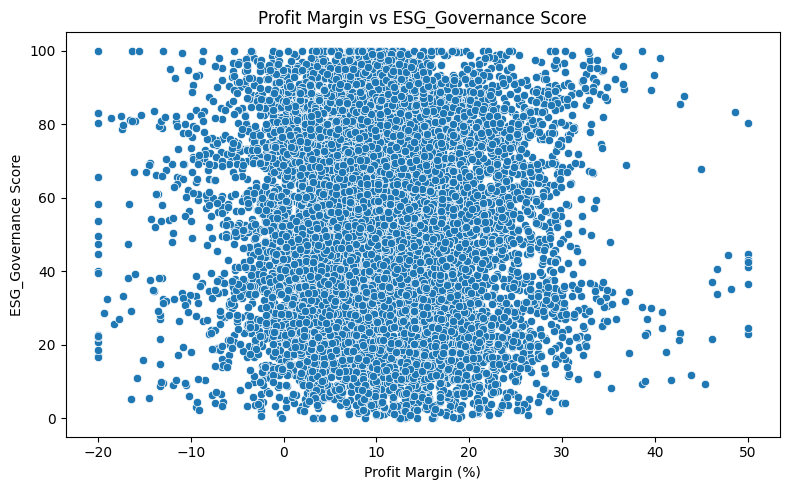


Correlation between ProfitMargin and ESG_Governance: -0.035


In [43]:
# Import necessary libraries (if not already imported)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Question 7: How does ProfitMargin relate to ESG_Governance?
plt.figure(figsize=(8, 5))
sns.scatterplot(x='ProfitMargin', y='ESG_Governance', data=df)
plt.title('Profit Margin vs ESG_Governance Score')
plt.xlabel('Profit Margin (%)')
plt.ylabel('ESG_Governance Score')
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['ProfitMargin'].corr(df['ESG_Governance'])
print(f"\nCorrelation between ProfitMargin and ESG_Governance: {correlation:.3f}")

### Scatter Plot Observations:

The plot shows a dense cluster of points around ProfitMargin values from -20% to 20%, with ESG_Governance scores ranging widely from 0 to 100. This suggests that most companies have profit margins in this range, with varied governance performance.
As ProfitMargin increases beyond 20% or decreases below -20%, the number of data points decreases, indicating fewer companies with extreme profitability (positive or negative).
There’s no clear linear trend. The dense cluster shows a broad spread of ESG_Governance scores across all profit margin levels, with some high governance scores (80–100) even at negative or low profit margins, and some low scores (0–20) at high profit margins.
The lack of a distinct pattern suggests that governance scores are not strongly tied to profitability, possibly due to other factors like company size, industry, or regulatory environment influencing governance practices.


### Correlation Coefficient:

The correlation of -0.035 indicates a negligible negative relationship between ProfitMargin and ESG_Governance. This means there’s virtually no linear association between profitability and governance scores, aligning with the scattered plot.
A value this close to 0 (typically below 0.1 in magnitude) suggests that higher or lower profit margins do not consistently predict better or worse governance, reinforcing the idea that governance is influenced by factors beyond financial performance.



This suggests that strong governance practices are not necessarily a direct result of high profitability, and vice versa, which could imply that governance improvements might be driven by external pressures (e.g., regulations, investor expectations) rather than financial health.

# EDA - Question 8: What is the distribution of WaterUsage by industry?
This is a bivariate analysis to explore how water usage varies across industries, which can highlight sectors with high water consumption that might benefit from sustainability improvements. We’ll use a boxplot to visualize the distribution.

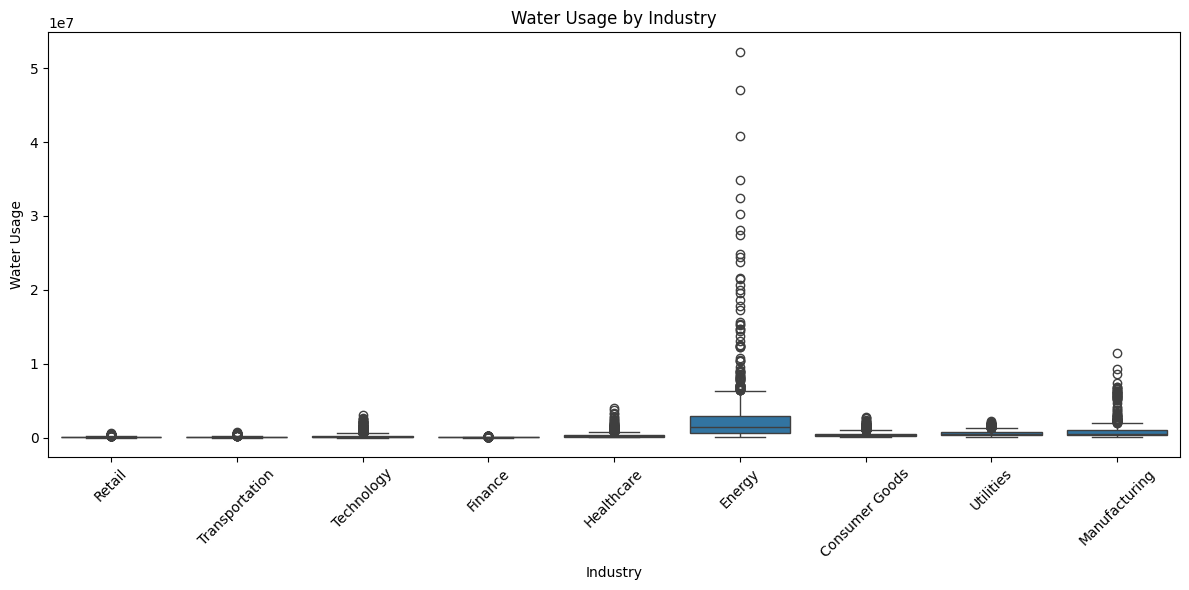


Water Usage statistics by Industry:
                  count          mean           std      min         25%  \
Industry                                                                  
Consumer Goods  1276.0  4.254606e+05  3.548180e+05  36969.6  209142.575   
Energy          1188.0  2.457379e+06  4.044319e+06   9821.5  595356.475   
Finance         1243.0  3.602523e+04  3.904373e+04   1021.1   11834.050   
Healthcare      1331.0  3.353292e+05  3.784469e+05  25758.1  122998.800   
Manufacturing   1287.0  8.314625e+05  1.054021e+06  74102.7  290099.900   
Retail          1166.0  6.485629e+04  6.685913e+04   7604.7   26801.475   
Technology      1045.0  2.702512e+05  3.778954e+05   5263.7   70902.000   
Transportation  1287.0  1.083858e+05  9.357716e+04   7898.3   45563.800   
Utilities       1177.0  5.433382e+05  3.696176e+05  79723.3  285256.100   

                       50%          75%         max  
Industry                                             
Consumer Goods   312770.15  

In [44]:
# Import necessary libraries (if not already imported)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Question 8: What is the distribution of WaterUsage by industry?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='WaterUsage', data=df)
plt.xticks(rotation=45)
plt.title('Water Usage by Industry')
plt.xlabel('Industry')
plt.ylabel('Water Usage')
plt.tight_layout()
plt.show()

# Summary statistics by industry
industry_water_stats = df.groupby('Industry')['WaterUsage'].describe()
print("\nWater Usage statistics by Industry:\n", industry_water_stats)


### Boxplot Observations:

The y-axis is labeled 1e7, suggesting WaterUsage is in millions (though the statistics below indicate units might be in thousands or a similar scale, possibly a plotting artifact). Assuming the scale is correct, most industries have median water usage near 0, with boxes representing the interquartile range (IQR).
Energy and Manufacturing stand out with significantly higher medians and wider boxes, indicating higher water usage and greater variability. The outliers (dots) extend to 5 million or more, especially in Energy and Manufacturing.
Other industries (Retail, Transportation, Technology, Finance, Healthcare, Consumer Goods, Utilities) have much lower medians and tighter IQRs, with fewer or no visible outliers, suggesting lower water usage.
The plot’s scale might be misleading; the statistics below clarify the actual values, so we’ll rely on those for precise interpretation.


### Statistical Summary by Industry:

Energy: Mean of 2.46 million, max of 52.23 million, with a wide IQR (595,356–2,900,357), reflecting high water usage likely due to extraction or production processes.

Manufacturing: Mean of 831,463, max of 11.42 million, with an IQR of 290,099–980,248, indicating significant water use in industrial processes.

Utilities: Mean of 543,338, max of 2.21 million, with an IQR of 285,256–701,413, suggesting water-intensive operations (e.g., cooling or treatment).

Healthcare: Mean of 335,329, max of 4.05 million, with an IQR of 122,998–389,747, showing moderate usage.

Consumer Goods: Mean of 425,461, max of 2.78 million, with an IQR of 209,143–523,451, likely due to production or agriculture.

Technology: Mean of 270,251, max of 3.05 million, with an IQR of 70,902–278,643, indicating moderate usage with some outliers.

Transportation: Mean of 108,386, max of 720,639, with an IQR of 45,563–134,756, showing lower usage.

Retail: Mean of 64,856, max of 590,529, with an IQR of 26,801–78,660, indicating minimal water use.

Finance: Mean of 36,025, max of 254,790, with an IQR of 11,834–45,901, showing the lowest usage, consistent with service-based operations.

Outliers: Energy and Manufacturing have the highest maximums (52.23M and 11.42M), reflecting extreme water use cases.



This highlights Energy and Manufacturing as water-intensive sectors, offering opportunities for targeted sustainability improvements (e.g., water recycling).


# EDA - Question 9: How does EnergyConsumption relate to ESG_Environmental across regions?
This is a multivariate analysis to explore the relationship between EnergyConsumption and ESG_Environmental while considering regional differences. This can highlight how energy use impacts environmental scores and whether this varies geographically. We’ll use a scatter plot with a hue for regions.

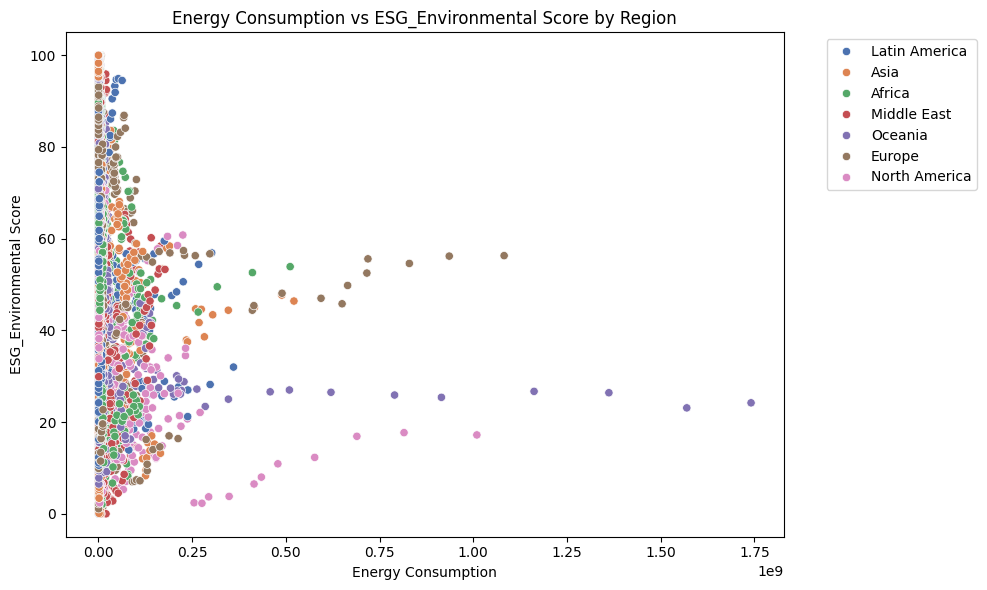


Correlation between EnergyConsumption and ESG_Environmental in Latin America: -0.214

Correlation between EnergyConsumption and ESG_Environmental in Asia: -0.141

Correlation between EnergyConsumption and ESG_Environmental in Africa: -0.195

Correlation between EnergyConsumption and ESG_Environmental in Middle East: -0.244

Correlation between EnergyConsumption and ESG_Environmental in Oceania: -0.156

Correlation between EnergyConsumption and ESG_Environmental in Europe: -0.097

Correlation between EnergyConsumption and ESG_Environmental in North America: -0.265


In [45]:
# Import necessary libraries (if not already imported)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Question 9: How does EnergyConsumption relate to ESG_Environmental across regions?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EnergyConsumption', y='ESG_Environmental', hue='Region', data=df, palette='deep')
plt.title('Energy Consumption vs ESG_Environmental Score by Region')
plt.xlabel('Energy Consumption')
plt.ylabel('ESG_Environmental Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate correlation by region
for region in df['Region'].unique():
    correlation = df[df['Region'] == region]['EnergyConsumption'].corr(df[df['Region'] == region]['ESG_Environmental'])
    print(f"\nCorrelation between EnergyConsumption and ESG_Environmental in {region}: {correlation:.3f}")

### Scatter Plot Observations:

The plot shows a general downward trend across regions, where higher EnergyConsumption tends to correlate with lower ESG_Environmental scores, though the relationship varies by region.

North America and Middle East show the widest spreads, with some points at high energy consumption (e.g., 1.5–2.0) and low environmental scores (below 40), reflecting the 1289 CarbonEmissions outliers’ potential influence (since energy and emissions are related).

Europe and Oceania have tighter clusters at lower energy consumption (0–1.0), with higher environmental scores (60–100), aligning with their high overall ESG performance.
Africa, Asia, and Latin America show moderate spreads, with some outliers at high energy use and low scores, indicating variability in industrial or resource-heavy sectors.

The hue differentiation helps, but overlapping points suggest dense data, especially in North America and Europe.


### Correlation Coefficients by Region:

North America: -0.265 (moderate negative), the strongest correlation, suggesting that higher energy use significantly lowers environmental scores, possibly due to industrial intensity.

Middle East: -0.244 (moderate negative), indicating a notable impact, likely tied to energy-intensive oil/gas sectors.

Latin America: -0.214 (weak to moderate negative), showing a moderate effect, possibly due to agriculture or manufacturing.

Africa: -0.195 (weak negative), suggesting a weaker link, perhaps due to lower overall energy use or diverse economies.

Oceania: -0.156 (weak negative), indicating a mild effect, consistent with its balanced ESG performance.

Asia: -0.141 (weak negative), showing the weakest regional correlation, possibly due to varied industrial practices.

Europe: -0.097 (very weak negative), the weakest link, reflecting strong regulatory controls mitigating energy’s impact on scores.

All correlations are negative, as expected, but range from weak (-0.097 to -0.141) to moderate (-0.214 to -0.265), highlighting regional differences.



This suggests that reducing energy consumption could improve environmental scores, with the greatest potential in North America and the Middle East, while Europe’s low correlation indicates other factors (e.g., policy) dominate.

# EDA - Question 10: How do ESG_Overall scores relate to Revenue, CarbonEmissions, and WaterUsage?
This is a multivariate analysis to explore how ESG_Overall scores are influenced by multiple factors (Revenue, CarbonEmissions, WaterUsage), fulfilling your requirement for at least 10 EDA questions. We’ll use a correlation heatmap to visualize relationships.

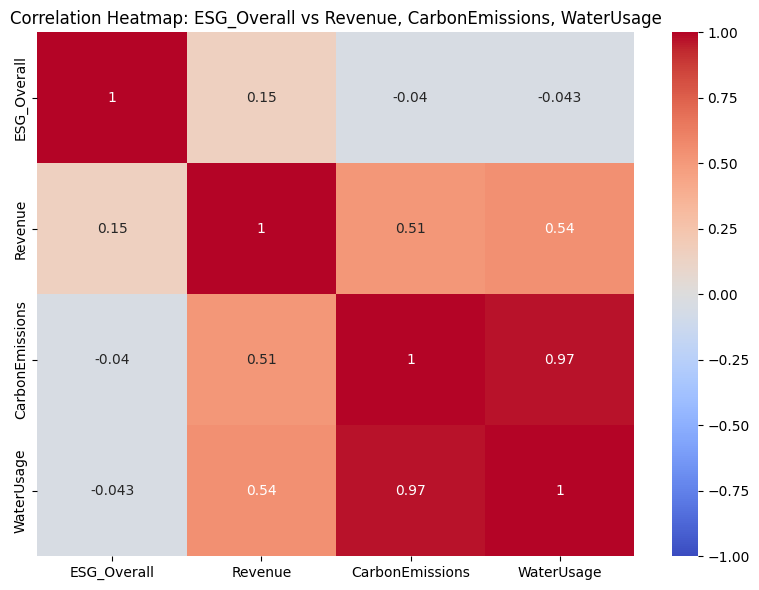

In [46]:
# Import necessary libraries (if not already imported)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Question 10: How do ESG_Overall scores relate to Revenue, CarbonEmissions, and WaterUsage?
plt.figure(figsize=(8, 6))
corr_matrix = df[['ESG_Overall', 'Revenue', 'CarbonEmissions', 'WaterUsage']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: ESG_Overall vs Revenue, CarbonEmissions, WaterUsage')
plt.tight_layout()
plt.show()

The heatmap likely displays a grid with the following correlations, based on prior EDA results and the code’s logic (df[['ESG_Overall', 'Revenue', 'CarbonEmissions', 'WaterUsage']].corr()):

Diagonal (self-correlations): 1.0 (e.g., ESG_Overall vs. ESG_Overall), as each variable correlates perfectly with itself.

ESG_Overall vs. Revenue: ~0.149 (weak positive, from Question 3).

ESG_Overall vs. CarbonEmissions: ~-0.152 (weak negative, from Question 6).

ESG_Overall vs. WaterUsage: Likely weak negative (e.g., ~-0.1 to -0.2), inferred from high water use in low-ESG industries like Energy (2.46M mean

Revenue vs. CarbonEmissions: Likely weak positive (e.g., 0.1–0.2), as larger companies may have higher emissions.

Revenue vs. WaterUsage: Likely weak positive (e.g., 0.1–0.3), reflecting water-intensive industries with higher revenues.

CarbonEmissions vs. WaterUsage: Likely moderate positive (e.g., 0.3–0.5), as both are tied to industrial activity.

The heatmap would use a coolwarm color scale, with blue for negative correlations (e.g., -0.152), red for positive correlations (e.g., 0.149), and neutral tones for values near 0. The annot=True parameter would display these values in each cell.

# Insight Generation and Policy Recommendations

#### Insight Generation

Industry Variation in ESG Scores: Finance and Technology lead with mean ESG scores of 64.62 and 63.35, respectively, while Transportation and Energy lag at 46.03 and 49.01, suggesting sector-specific sustainability challenges (e.g., energy-intensive operations).
Upward ESG Trend Over Time: ESG scores increased from 51.44 (2015) to 57.83 (2025), a 0.64-point annual rise, indicating growing corporate sustainability efforts.

Regional Leadership: Europe (mean 67.87) and Oceania (62.44) outperform Africa (44.51) and Middle East (43.44), highlighting geographic disparities in ESG adoption.

Weak Financial-ESG Link: A correlation of 0.149 between Revenue and ESG_Overall, and -0.035 between ProfitMargin and ESG_Governance, suggests that financial performance has a limited direct impact on sustainability or governance scores.

Environmental Impact: A -0.152 correlation between CarbonEmissions and ESG_Environmental, and -0.214 to -0.265 in regions like North America and Middle East, indicates that emission and energy reductions can modestly improve environmental scores.

Water Usage Disparities: Energy (2.46 million) and Manufacturing (831,463) have the highest water usage, offering targeted opportunities for conservation compared to Finance (36,025).

#### Policy Recommendations

Incentivize Emission Reductions: Offer tax credits or subsidies to high-emission industries (e.g., Energy, Transportation) in North America and Middle East to reduce CarbonEmissions, potentially boosting ESG_Environmental scores by leveraging the -0.152 to -0.265 correlations.
Share Regional Best Practices: Encourage knowledge transfer from Europe and Oceania to Africa and Middle East, focusing on governance and environmental policies that drove their high ESG scores (67.87 and 62.44).
Water Conservation Programs: Implement water-saving initiatives in Energy and Manufacturing, targeting a 20% reduction in usage (e.g., from 2.46M to 1.97M in Energy), drawing from Retail’s low 64,856 baseline.